# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: kevin velasquez gonzalez
*Métodos computacionales 2025-I*

---

In [62]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
from scipy.integrate import quad, dblquad, simpson




# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

   tiempo  corriente
0    1.00       3.10
1    1.01       3.12
2    1.02       3.14
3    1.03       3.18
4    1.04       3.24
   tiempo  corriente  di_dt  voltaje
0    1.00       3.10    2.0  2.40020
1    1.01       3.12    2.0  2.40304
2    1.02       3.14    3.0  3.38588
3    1.03       3.18    5.0  5.35156
4    1.04       3.24    7.0  7.32008


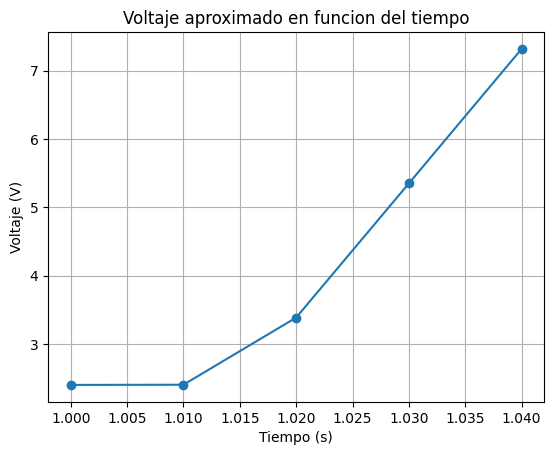

In [55]:
# Datos
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo en segundos
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente en amperios

# Constantes
L = 0.98   # inductancia en henrios
R = 0.142  # resistencia en ohmios

# Crear dataframe
df = pd.DataFrame({'tiempo': t, 'corriente': i})
print(df)

# Metodo de diferencias finitas de 3 puntos
# centradas en el medio y hacia adelante y atras en extremos

diferencias_dt = np.zeros(len(i))

# hacia adelante
diferencias_dt[0] = (-3*i[0] + 4*i[1] - i[2]) / (2*(t[1] - t[0]))

# hacia atras
diferencias_dt[-1] = (3*i[-1] - 4*i[-2] + i[-3]) / (2*(t[1] - t[0]))

# centradas
for k in range(1, len(i)-1):
    diferencias_dt[k] = (i[k+1] - i[k-1]) / (2*(t[1] - t[0]))

# calcular voltaje usando la ecuacion
e = L * diferencias_dt + R * i

# mostrar resultados
df['di_dt'] = diferencias_dt
df['voltaje'] = e

print(df)

# Graficar voltaje vs tiempo
plt.plot(t, e, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje aproximado en funcion del tiempo')
plt.grid()
plt.show()


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [56]:
# Datos
t = np.array([0, 3, 5, 8, 10, 13])  # tiempo en segundos
x = np.array([0, 225, 383, 623, 742, 993])  # distancia en metros

# Crear polinomio de interpolacion
interp = BarycentricInterpolator(t, x)

# Derivada del polinomio evaluada en los puntos t
v_todos = interp.derivative(t)

# Calcular velocidad en t=12
v_12 = interp.derivative(12)

print("Velocidades en cada tiempo:")
print(v_todos)

print("Velocidad en t=12:")
print(v_12)

Velocidades en cada tiempo:
[ 98.90247253  72.56483516  84.08736264  68.81236264  53.60650183
 156.64413919]
Velocidad en t=12:
91.73697802197806


# 3.
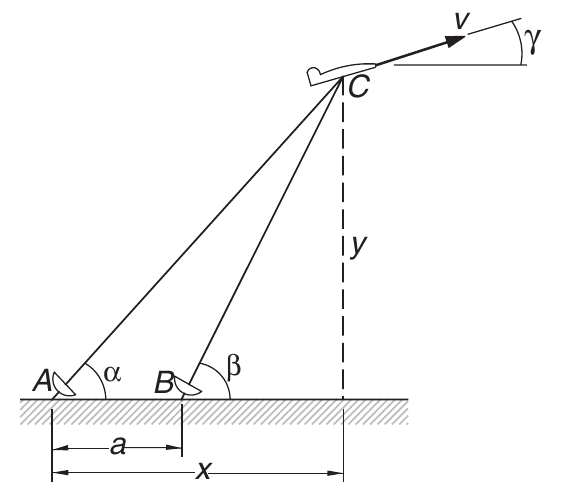


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [57]:
# Datos
a = 500  # metros
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)

# Calculo de posiciones x y y para cada tiempo
alpha_rad = np.radians(df['alpha (°)'])
beta_rad = np.radians(df['beta (°)'])

tan_alpha = np.tan(alpha_rad)
tan_beta = np.tan(beta_rad)

x = a * tan_beta / (tan_beta - tan_alpha)
y = a * tan_alpha * tan_beta / (tan_beta - tan_alpha)

# Guardar coordenadas en el dataframe
df['x (m)'] = x
df['y (m)'] = y

print(df)

# Calcular velocidad v y angulo gamma en t=10
dx = x[2] - x[0]
dy = y[2] - y[0]
dt = df['t (s)'][2] - df['t (s)'][0]

distancia = np.sqrt(dx**2 + dy**2)
v = distancia / dt  # m/s

gamma = np.degrees(np.arctan(dy / dx))  # grados

print("Velocidad del avion (m/s):", v)
print("Angulo de ascenso (grados):", gamma)


   t (s)  alpha (°)  beta (°)        x (m)        y (m)
0      9      54.80     65.59  1401.918398  1987.346016
1     10      54.06     64.59  1450.497006  2000.840713
2     11      53.34     63.62  1498.640350  2013.512411
Velocidad del avion (m/s): 50.09944162965305
Angulo de ascenso (grados): 15.137987979364004


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [58]:
# Datos
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

# tomar datos hasta 28s
indice_28 = np.where(t == 28)[0][0] + 1

t_corte = t[:indice_28]
v_corte = v[:indice_28]

# integral para distancia usando Simpson
distancia = simpson(v_corte, t_corte)

print("Distancia total desde t=0 hasta t=28 segundos:")
print(distancia, "metros")

# Aceleracion usando derivada del polinomio de interpolacion
interp = BarycentricInterpolator(t, v)
derivada = interp.derivative(t)

aceleracion_28 = derivada[np.where(t == 28)[0][0]] # acesso a la derivada t=28s

print("Aceleracion en t=28 segundos:")
print(aceleracion_28, "m/s^2")

Distancia total desde t=0 hasta t=28 segundos:
2319.766666666667 metros
Aceleracion en t=28 segundos:
1.7344345238095142 m/s^2


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [59]:
# Datos
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
v = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m^3
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentracion en g/m^3

# Diferenciar volumen para encontrar As(z)
derivada_dz = np.gradient(v, z)
As = -derivada_dz  # negativo como dice la formula

# Volumen total
Volumen_total = simpson(As, z)

# Integral para concentracion promedio
integral_concentracion = simpson(c * As, z)

# Concentracion promedio
concentracion_promedio = integral_concentracion / Volumen_total

print("Concentracion promedio en el lago:")
print(concentracion_promedio, "g/m^3")

Concentracion promedio en el lago:
8.097333333333333 g/m^3


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



/tmp/ipython-input-60-1652410126.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(y, r)


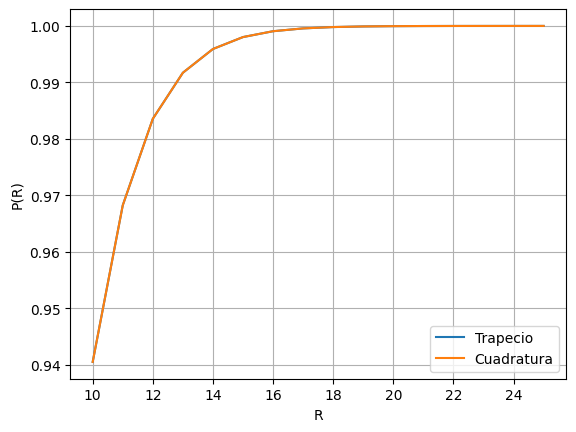

Probabilidad total: 1.0


In [60]:
# Funcion que se integra
def f(r):
    return r**2 * (2 - r)**2 * np.exp(-r)

# Constante
constante = 1/8

# Metodo trapezoidal
def metodo_trapecio(R, n=1000):
    r = np.linspace(0, R, n)
    y = f(r)
    integral = np.trapz(y, r)
    return constante * integral

# Metodo Simpson
def metodo_simpson(R, n=1000):
    r = np.linspace(0, R, n)
    y = f(r)
    integral = simpson(y, r)
    return constante * integral

# Metodo cuadratura
def metodo_cuadratura(R):
    integral, error = quad(f, 0, R, epsabs=1e-6)
    return constante * integral

# Valores de R
valores = np.arange(10, 26, 1)

# Calcular probabilidades
pro_trap = [metodo_trapecio(R) for R in valores]
pro_simp = [metodo_simpson(R) for R in valores]
pro_quad = [metodo_cuadratura(R) for R in valores]

# Graficar
plt.plot(valores, pro_trap, label='Trapecio')
#plt.plot(R_vals, p_simp, label='Simpson')
plt.plot(valores, pro_quad, label='Cuadratura')
plt.xlabel('R')
plt.ylabel('P(R)')
plt.legend()
plt.grid()
plt.show()

# Probabilidad total desde r=0 hasta infinito
Pro_total, error_total = quad(f, 0, np.inf, epsabs=1e-6)
Pro_total = constante * Pro_total

print("Probabilidad total:", Pro_total)

#se nota solo un metodo por que los tres dan la misma curva

# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

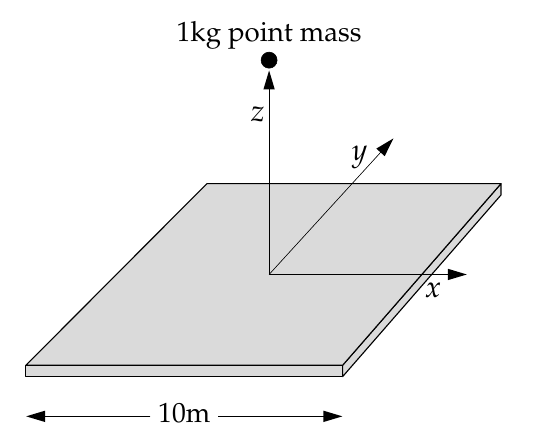

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


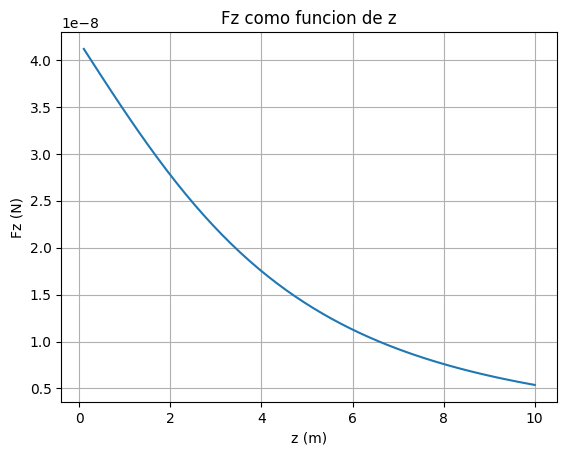

In [63]:
# Constantes
G = 6.674e-11
M = 10000
L = 10
sigma = M / (L**2)

# Funcion para integrar
def integrando(y, x, z):
    return 1 / (x**2 + y**2 + z**2)**(1.5)

# Funcion Fz en cada z
def Fz(z):
    integral, error = dblquad(
        integrando,
        -L/2, L/2,
        lambda x: -L/2,
        lambda x: L/2,
        args=(z,)
    )
    return G * sigma * z * integral

# Valores de z
z_vals = np.linspace(0.1, 10, 50)  # desde 0.1 hasta 10

# Calcular Fz en cada z
Fz_vals = [Fz(z) for z in z_vals]

# Graficar
plt.plot(z_vals, Fz_vals)
plt.xlabel('z (m)')
plt.ylabel('Fz (N)')
plt.title('Fz como funcion de z')
plt.grid()
plt.show()
